In [54]:
import pandas as pd
import numpy as np

import nltk
import re
import csv
import json

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [56]:
file_path = 'movies.csv'
data= pd.read_csv(file_path)
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [58]:
#method for normalizing the movies and dropping stop words
def formatTitle(val):
    val = re.sub(r'[^A-Za-z ]', "", val)
    val = val.strip()
    words = val.lower().split()

    stops = set(stopwords.words('english'))
    words = [w for w in words if not w in stops]
    wordsi  = [w for w in words if len(w)>2]
    val = " ".join([str(x) for x in wordsi])

    return val

In [60]:
data_formatted = pd.DataFrame(data)
data_formatted['title'] = data_formatted['title'].apply(formatTitle)

data_formatted.head()

,movieId,title,genres
0,1,toy story,Adventure|Animation|Children|Comedy|Fantasy
1,2,jumanji,Adventure|Children|Fantasy
2,3,grumpier old men,Comedy|Romance
3,4,waiting exhale,Comedy|Drama|Romance
4,5,father bride part,Comedy


In [61]:
#drop anything with no genre listed
data_formatted = data_formatted.drop(data_formatted[data_formatted['genres']=='(no genres listed)'].index)
data_formatted.head()

,movieId,title,genres
0,1,toy story,Adventure|Animation|Children|Comedy|Fantasy
1,2,jumanji,Adventure|Children|Fantasy
2,3,grumpier old men,Comedy|Romance
3,4,waiting exhale,Comedy|Drama|Romance
4,5,father bride part,Comedy


In [62]:
data_formatted['genres'] = data_formatted['genres'].str.split('|')
data_formatted.head()
    

,movieId,title,genres
0,1,toy story,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,jumanji,"[Adventure, Children, Fantasy]"
2,3,grumpier old men,"[Comedy, Romance]"
3,4,waiting exhale,"[Comedy, Drama, Romance]"
4,5,father bride part,[Comedy]


In [63]:
vectorizer = CountVectorizer()

In [64]:
title_vector = vectorizer.fit_transform(data_formatted['title'])

In [65]:
from sklearn.preprocessing import MultiLabelBinarizer

In [66]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data_formatted['genres'])

MultiLabelBinarizer()

In [67]:
y = multilabel_binarizer.fit_transform(data_formatted['genres'])
list(multilabel_binarizer.classes_)

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(title_vector, y, test_size=.2, random_state=42)

<font size ='3'>Developing the Model</font>

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
forest = RandomForestClassifier(max_depth = 5, n_estimators=100, min_samples_split = 3, max_features=5)

In [72]:
model=OneVsRestClassifier(forest)

In [73]:
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                     max_features=5,
                                                     min_samples_split=3))

In [86]:
y_pred = model.predict(x_test)

In [87]:
y_pred[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
print(accuracy_score(y_test, y_pred))

0.0


In [93]:
y_pred_prob = model.predict_proba(x_test)
y_pred_new = (y_pred_prob >= .3).astype(int)

In [95]:
from sklearn.metrics import f1_score, recall_score, precision_score

print("F1 score for y_pred: ", f1_score(y_test, y_pred, average='micro'))
print("F1 score for y_pred_new: " ,f1_score(y_test, y_pred_new, average='micro'))
print("Recall for y_pred: ", recall_score(y_test, y_pred, average='micro'))
print("Recall score for y_pred_new: ", recall_score(y_test, y_pred_new, average='micro'))
print("Precision score for y_pred: ", precision_score(y_test, y_pred, average='micro'))
print("Precision score for y_pred_new: ", precision_score(y_test, y_pred_new, average='micro'))
print("Accuracy score for y_pred: ", accuracy_score(y_test, y_pred))
print("Accuracy score for y_pred_new: ", accuracy_score(y_test, y_pred_new))

F1 score for y_pred:  0.0
F1 score for y_pred_new:  0.3128522086893292
Recall for y_pred:  0.0
Recall score for y_pred_new:  0.24066564116906727
Precision score for y_pred:  0.0
Precision score for y_pred_new:  0.44689690989353414
Accuracy score for y_pred:  0.0
Accuracy score for y_pred_new:  0.15906911880066243


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:
print(y_pred_new[0])
print(multilabel_binarizer.inverse_transform(y_pred_new)[0])
print(multilabel_binarizer.inverse_transform(y_test)[0])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
('Drama',)
('Children', 'Documentary', 'Drama')


In [99]:
print(accuracy_score(y_test, y_pred_new))

0.15906911880066243


In [101]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1485
           1       0.00      0.00      0.00       808
           2       0.00      0.00      0.00       611
           3       0.00      0.00      0.00       566
           4       0.59      0.01      0.03      3382
           5       0.00      0.00      0.00      1099
           6       0.00      0.00      0.00      1148
           7       0.45      1.00      0.62      5116
           8       0.00      0.00      0.00       561
           9       0.00      0.00      0.00        75
          10       0.00      0.00      0.00      1162
          11       0.00      0.00      0.00        42
          12       0.00      0.00      0.00       209
          13       0.00      0.00      0.00       581
          14       0.00      0.00      0.00      1482
          15       0.00      0.00      0.00       698
          16       0.00      0.00      0.00      1749
          17       0.00    

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [103]:
print(multilabel_binarizer.inverse_transform(y_test)[0])
print(y_test[0])
print(multilabel_binarizer.inverse_transform(y_pred)[0])
print(y_pred[0])

print(y_pred_prob[0])
print(multilabel_binarizer.inverse_transform(y_pred_new)[0])
print(y_pred_new[0])

('Children', 'Documentary', 'Drama')
[0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
()
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.1275401  0.0724942  0.05067968 0.05141999 0.29445    0.09204134
 0.0970203  0.44664932 0.04717678 0.00599817 0.10508158 0.00335974
 0.01852115 0.05116243 0.13608158 0.06307253 0.15010626 0.03221111
 0.02442935]
('Drama',)
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


<font size=3>Component Analysis</font>

In [130]:
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=3)

In [133]:
importances = forest.feature_importances_

In [135]:
feature_names = vectorizer.get_feature_names_out()

In [137]:
feature_importance = zip(feature_names, importances)

sorted_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True)

In [139]:
top_features = sorted_importance[:20]
top_features

[('kill', 0.011258334309244855),
 ('dracula', 0.009114756229714147),
 ('dead', 0.007185171403240507),
 ('hobgoblins', 0.005762003035794733),
 ('curse', 0.005701311047101366),
 ('amazons', 0.005637561613749367),
 ('holmes', 0.00543559751626192),
 ('wedding', 0.005401115425954286),
 ('musashi', 0.005365913117199442),
 ('film', 0.005237517542311565),
 ('arn', 0.005121784309448882),
 ('samurai', 0.005031911985809732),
 ('hunt', 0.004872282950946374),
 ('charlie', 0.004860184565866847),
 ('louis', 0.004708383264887294),
 ('fighter', 0.004693503002861105),
 ('tarzan', 0.004690112451308311),
 ('gor', 0.004530784505002622),
 ('lampoons', 0.0044436174433289),
 ('argonauts', 0.004415463797984358)]

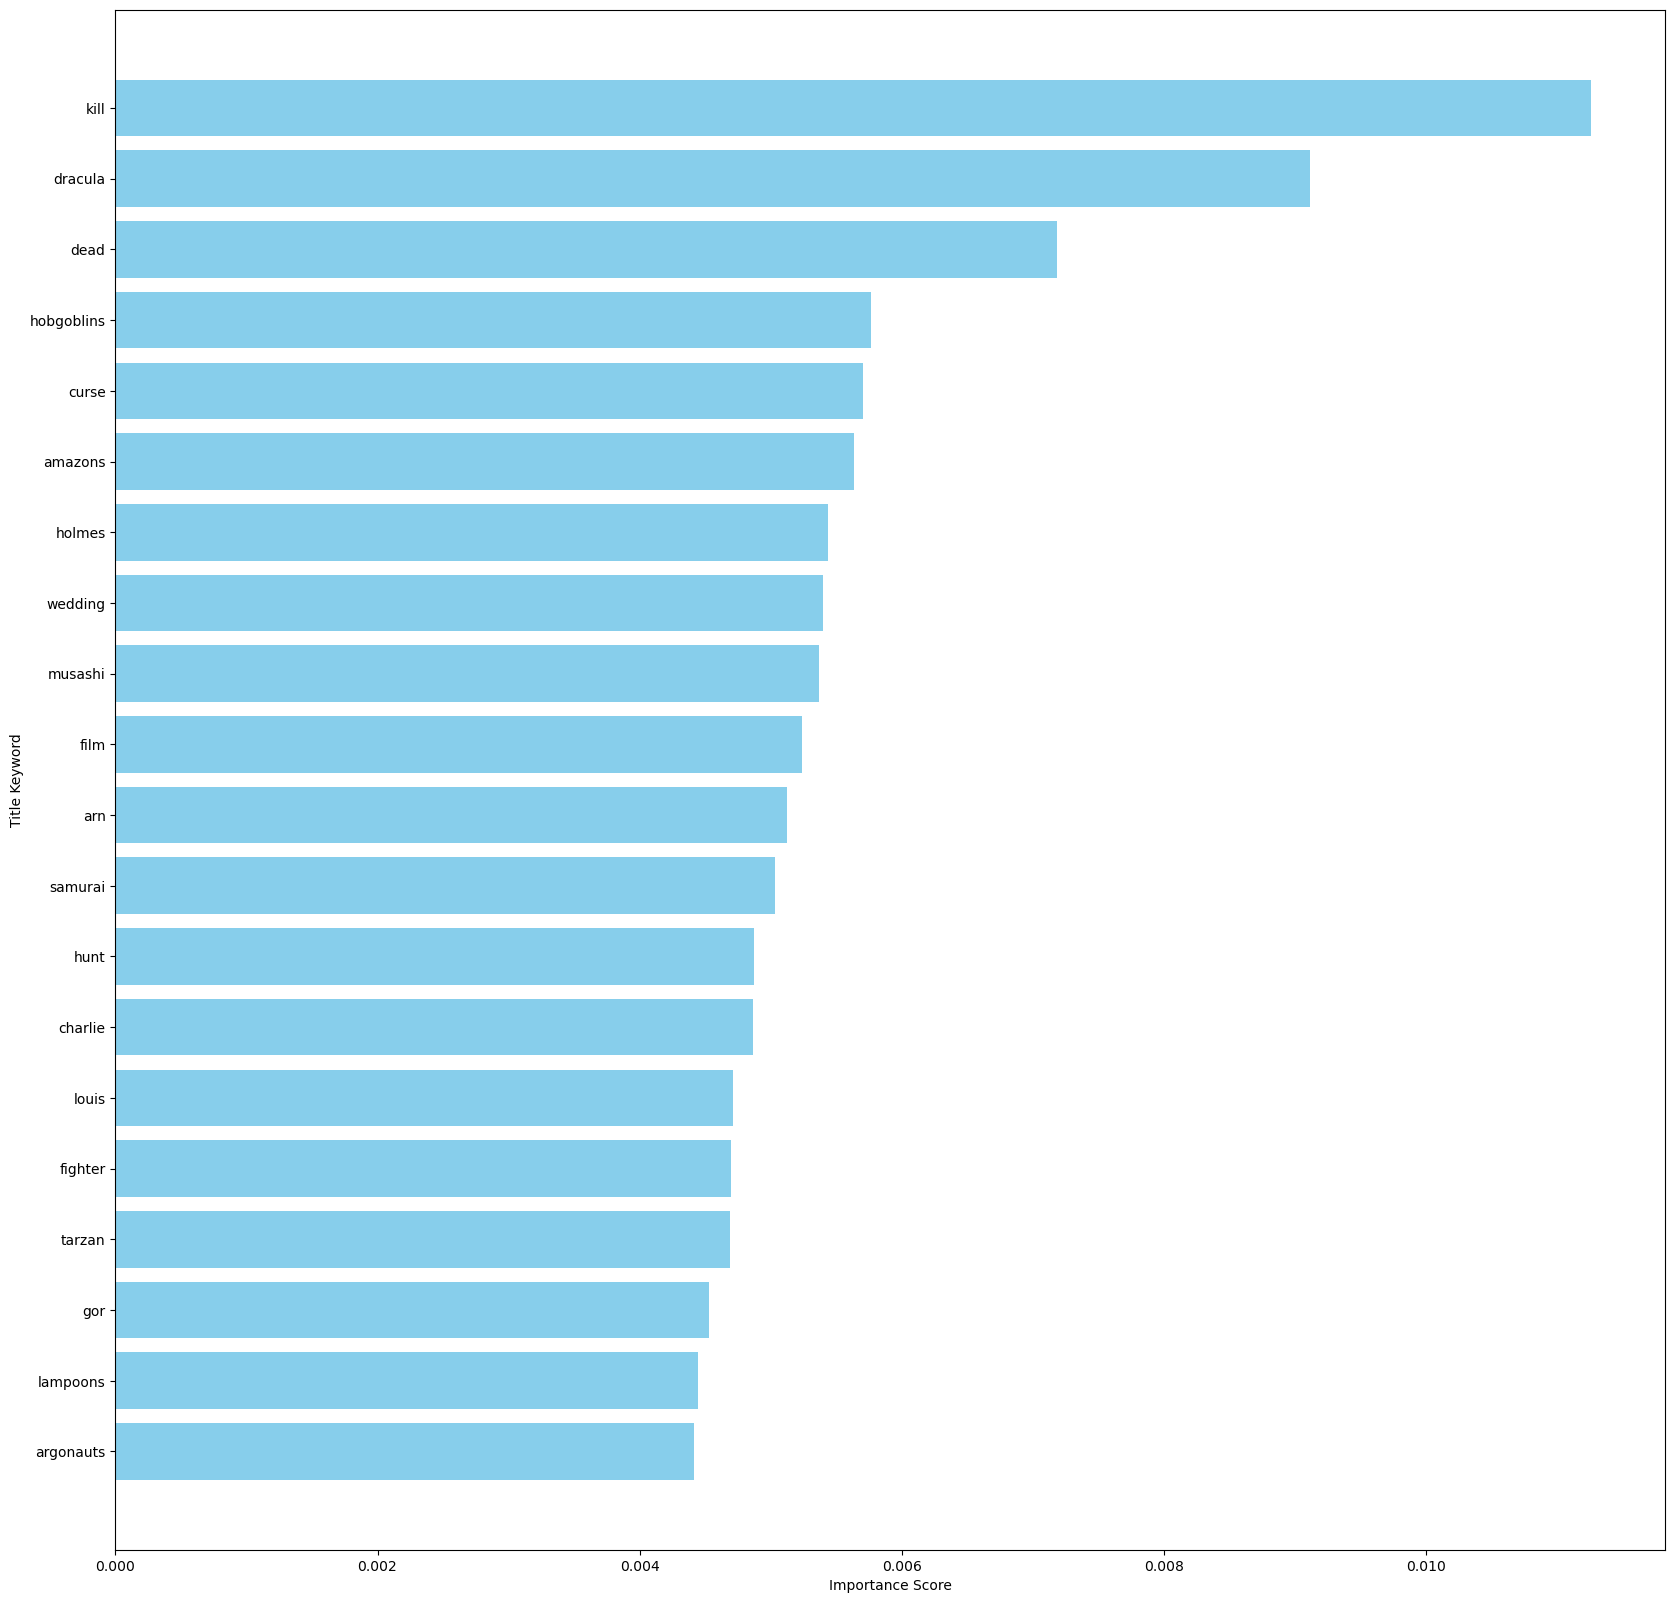

In [141]:
features = [x[0] for x in top_features]
scores = [x[1] for x in top_features]

plt.figure(figsize=(20,20))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Title Keyword')
plt.gca().invert_yaxis()
plt.show()

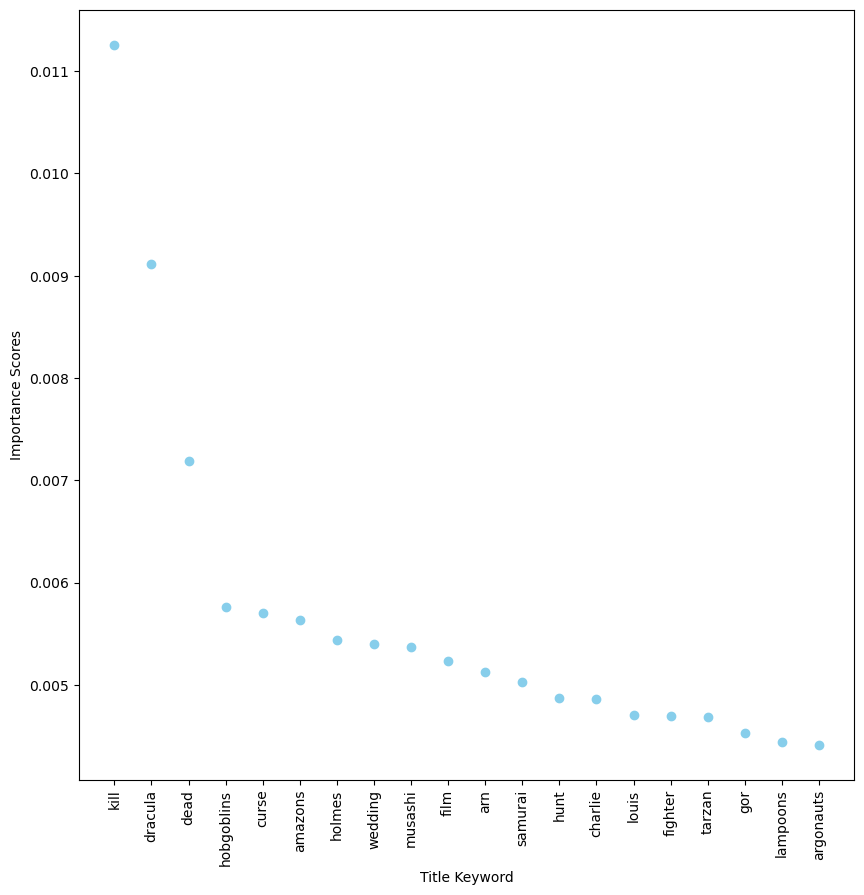

In [143]:
features = [x[0] for x in top_features]
scores = [x[1] for x in top_features]

plt.figure(figsize=(10,10))
plt.scatter(features, scores, color='skyblue')
plt.xlabel('Title Keyword')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
#plt.gca().invert_yaxis()
plt.show()

<font size='4'>Checking all genres</font>

In [102]:
data_genres_split = pd.DataFrame(data)
data_genres_split = data_genres_split.assign(genres=data_formatted['genres'].str.split('|')).explode('genres')
data_genres_split.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [106]:
l = data_genres_split['genres'].value_counts()
l

genres
Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
Name: count, dtype: int64